In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.naive_bayes import GaussianNB
import time
import numpy as np
import pandas as pd
import statistics
import random


In [2]:
df=pd.read_csv('first.csv')
col_num = 42
print(df)

        C1   C2       C3  C4   C5   C6  C7  C8  C9  C10  ...  C33  C34   C35  \
0        0  udp  private  SF  105  146   0   0   0    0  ...  254  1.0  0.01   
1        0  udp  private  SF  105  146   0   0   0    0  ...  254  1.0  0.01   
2        0  udp  private  SF  105  146   0   0   0    0  ...  254  1.0  0.01   
3        0  udp  private  SF  105  146   0   0   0    0  ...  254  1.0  0.01   
4        0  udp  private  SF  105  146   0   0   0    0  ...  254  1.0  0.01   
...     ..  ...      ...  ..  ...  ...  ..  ..  ..  ...  ...  ...  ...   ...   
311024   0  udp  private  SF  105  147   0   0   0    0  ...  255  1.0  0.00   
311025   0  udp  private  SF  105  147   0   0   0    0  ...  255  1.0  0.00   
311026   0  udp  private  SF  105  147   0   0   0    0  ...  255  1.0  0.00   
311027   0  udp  private  SF  105  147   0   0   0    0  ...  255  1.0  0.00   
311028   0  udp  private  SF  105  147   0   0   0    0  ...  255  1.0  0.00   

         C36  C37  C38  C39  C40  C41  

In [3]:
print(df)

        C1   C2       C3  C4   C5   C6  C7  C8  C9  C10  ...  C33  C34   C35  \
0        0  udp  private  SF  105  146   0   0   0    0  ...  254  1.0  0.01   
1        0  udp  private  SF  105  146   0   0   0    0  ...  254  1.0  0.01   
2        0  udp  private  SF  105  146   0   0   0    0  ...  254  1.0  0.01   
3        0  udp  private  SF  105  146   0   0   0    0  ...  254  1.0  0.01   
4        0  udp  private  SF  105  146   0   0   0    0  ...  254  1.0  0.01   
...     ..  ...      ...  ..  ...  ...  ..  ..  ..  ...  ...  ...  ...   ...   
311024   0  udp  private  SF  105  147   0   0   0    0  ...  255  1.0  0.00   
311025   0  udp  private  SF  105  147   0   0   0    0  ...  255  1.0  0.00   
311026   0  udp  private  SF  105  147   0   0   0    0  ...  255  1.0  0.00   
311027   0  udp  private  SF  105  147   0   0   0    0  ...  255  1.0  0.00   
311028   0  udp  private  SF  105  147   0   0   0    0  ...  255  1.0  0.00   

         C36  C37  C38  C39  C40  C41  

In [4]:
df.columns
feature_names = df.columns
feature_names = feature_names[:(col_num - 1)]
print(feature_names)

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21',
       'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31',
       'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C40', 'C41'],
      dtype='object')


<AxesSubplot:>

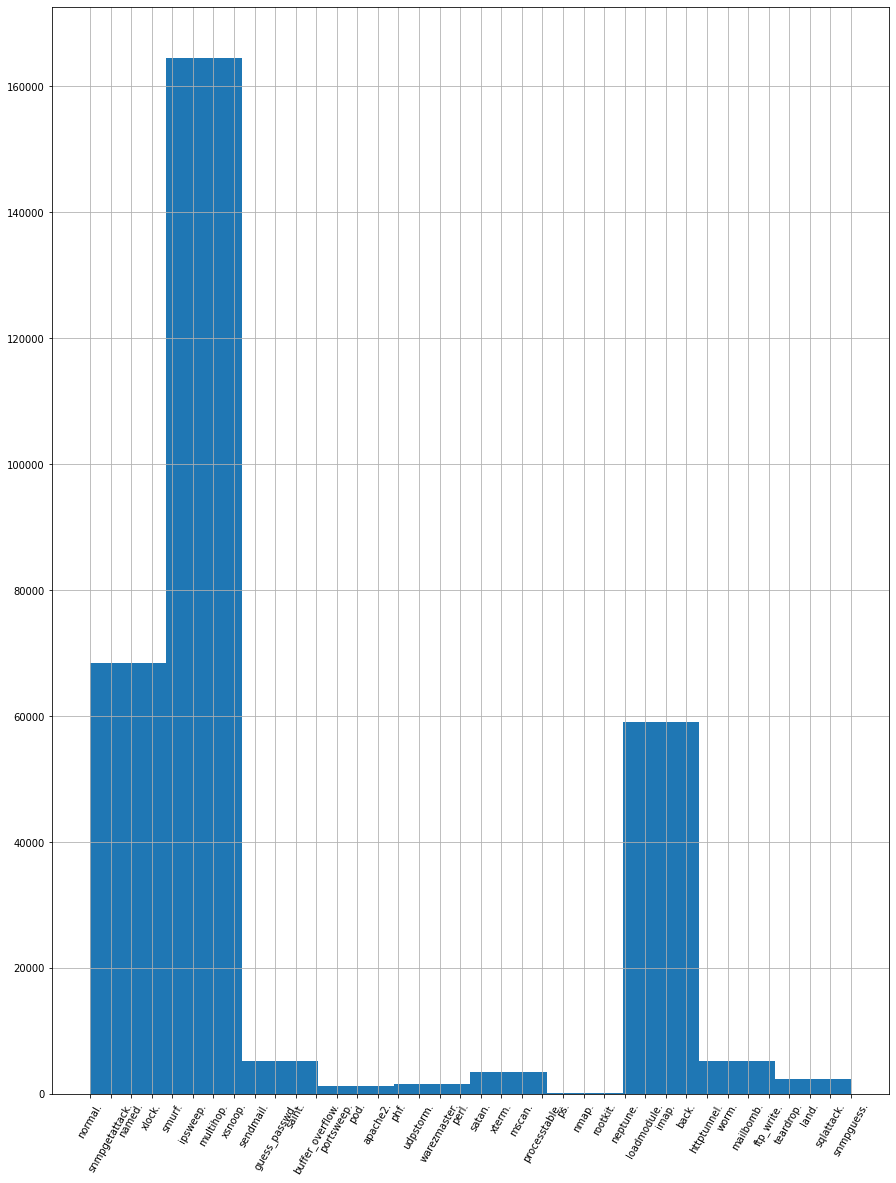

In [5]:
fig = plt.figure(figsize = (15,20))
plt.xticks(rotation = 60)
ax = fig.gca()
df['C42'].hist()

In [6]:
print(df['C42'].unique())

['normal.' 'snmpgetattack.' 'named.' 'xlock.' 'smurf.' 'ipsweep.'
 'multihop.' 'xsnoop.' 'sendmail.' 'guess_passwd.' 'saint.'
 'buffer_overflow.' 'portsweep.' 'pod.' 'apache2.' 'phf.' 'udpstorm.'
 'warezmaster.' 'perl.' 'satan.' 'xterm.' 'mscan.' 'processtable.' 'ps.'
 'nmap.' 'rootkit.' 'neptune.' 'loadmodule.' 'imap.' 'back.' 'httptunnel.'
 'worm.' 'mailbomb.' 'ftp_write.' 'teardrop.' 'land.' 'sqlattack.'
 'snmpguess.']


In [7]:
replace_col = df['C42']
replace_col.replace(to_replace = 'normal.', value = 1, inplace=True)

replace_col.replace(to_replace = 'smurf.', value = 2, inplace=True)
replace_col.replace(to_replace = 'snmpgetattack.', value = 2, inplace=True)
replace_col.replace(to_replace = 'udpstorm.', value = 2, inplace=True)
replace_col.replace(to_replace = 'neptune.', value = 2, inplace=True)

replace_col.replace(to_replace = 'buffer_overflow.', value = 3, inplace=True)
replace_col.replace(to_replace = 'loadmodule.', value = 3, inplace=True)
replace_col.replace(to_replace = 'perl.', value = 3, inplace=True)
replace_col.replace(to_replace = 'rootkit.', value = 3, inplace=True)
replace_col.replace(to_replace = 'snmpguess.', value = 3, inplace=True)
replace_col.replace(to_replace = 'worm.', value = 3, inplace=True)

replace_col.replace(to_replace = 'portsweep.', value = 4, inplace=True)
replace_col.replace(to_replace = 'nmap.', value = 4, inplace=True)
replace_col.replace(to_replace = 'satan.', value = 4, inplace=True)
replace_col.replace(to_replace = 'saint.', value = 4, inplace=True)
replace_col.replace(to_replace = 'mscan.', value = 4, inplace=True)
replace_col.replace(to_replace = 'ipsweep.', value = 4, inplace=True)

replace_col.replace(to_replace = 'guess_passwd.', value = 5, inplace=True)
replace_col.replace(to_replace = 'ftp_write.', value = 5, inplace=True)
replace_col.replace(to_replace = 'imap.', value = 5, inplace=True)
replace_col.replace(to_replace = 'phf.', value = 5, inplace=True)
replace_col.replace(to_replace = 'multihop.', value = 5, inplace=True)
replace_col.replace(to_replace = 'warezmaster.', value = 5, inplace=True)
replace_col.replace(to_replace = 'snmpgetattack.', value = 5, inplace=True)
replace_col.replace(to_replace = 'named.', value = 5, inplace=True)
replace_col.replace(to_replace = 'xlock.', value = 5, inplace=True)
replace_col.replace(to_replace = 'xsnoop.', value = 5, inplace=True)
replace_col.replace(to_replace = 'sendmail.', value = 5, inplace=True)

replace_col.replace(to_replace = 'pod.', value = 6, inplace=True)
replace_col.replace(to_replace = 'apache2.', value = 6, inplace=True)
replace_col.replace(to_replace = 'xterm.', value = 6, inplace=True)
replace_col.replace(to_replace = 'processtable.', value = 6, inplace=True)
replace_col.replace(to_replace = 'ps.', value = 6, inplace=True)
replace_col.replace(to_replace = 'back.', value = 6, inplace=True)
replace_col.replace(to_replace = 'httptunnel.', value = 6, inplace=True)
replace_col.replace(to_replace = 'mailbomb.', value = 6, inplace=True)
replace_col.replace(to_replace = 'teardrop.', value = 6, inplace=True)
replace_col.replace(to_replace = 'land.', value = 6, inplace=True)
replace_col.replace(to_replace = 'sqlattack.', value = 6, inplace=True)
print(df)

df = df[df['C42'] != 3]
df = df[df['C42'] != 4]
df = df[df['C42'] != 6]

        C1   C2       C3  C4   C5   C6  C7  C8  C9  C10  ...  C33  C34   C35  \
0        0  udp  private  SF  105  146   0   0   0    0  ...  254  1.0  0.01   
1        0  udp  private  SF  105  146   0   0   0    0  ...  254  1.0  0.01   
2        0  udp  private  SF  105  146   0   0   0    0  ...  254  1.0  0.01   
3        0  udp  private  SF  105  146   0   0   0    0  ...  254  1.0  0.01   
4        0  udp  private  SF  105  146   0   0   0    0  ...  254  1.0  0.01   
...     ..  ...      ...  ..  ...  ...  ..  ..  ..  ...  ...  ...  ...   ...   
311024   0  udp  private  SF  105  147   0   0   0    0  ...  255  1.0  0.00   
311025   0  udp  private  SF  105  147   0   0   0    0  ...  255  1.0  0.00   
311026   0  udp  private  SF  105  147   0   0   0    0  ...  255  1.0  0.00   
311027   0  udp  private  SF  105  147   0   0   0    0  ...  255  1.0  0.00   
311028   0  udp  private  SF  105  147   0   0   0    0  ...  255  1.0  0.00   

         C36  C37  C38  C39  C40  C41  

In [8]:
print(df['C42'].unique())

[1 2 5]


In [9]:
'''#df=df[(df['C42']=='normal.') | (df['C42']=='smurf.') | (df['C42']=='snmpgetattack.') | (df['C42']=='udpstorm.') | (df['C42']=='neptune.')]
tmp_df = pd.DataFrame()
#df=df[(df['C42']=='normal.') | (df['C42']=='buffer_overflow.') | (df['C42']=='loadmodule.') | (df['C42']=='perl.') | (df['C42']=='rootkit.') | (df['C42']=='snmpguess.') | (df['C42']=='worm.')]
#df=df[(df['C42']=='normal.') | (df['C42']=='portsweep.') | (df['C42']=='nmap.') | (df['C42']=='satan.') | (df['C42']=='saint.') | (df['C42']=='mscan.') | (df['C42']=='ipsweep.')]
#df=df[(df['C42']=='normal.') | (df['C42']=='guess_passwd.') | (df['C42']=='ftp_write.') | (df['C42']=='imap.') | (df['C42']=='phf.') | (df['C42']=='multihop.') | (df['C42']=='warezmaster.') | (df['C42']=='snmpgetattack.') | (df['C42']=='named.') | (df['C42']=='xlock.') | (df['C42']=='xsnoop.') | (df['C42']=='sendmail.')]
for i in range(col_num):
    if df['C42'][i]=='normal.':
        df['C42'][i] = '1'
    elif (df['C42'][i]=='smurf.') | (df['C42'][i]=='snmpgetattack.') | (df['C42'][i]=='udpstorm.') | (df['C42'][i]=='neptune.'):
        df['C42'][i] = '2'
    elif (df['C42'][i]=='buffer_overflow.') | (df['C42'][i]=='loadmodule.') | (df['C42'][i]=='perl.') | (df['C42'][i]=='rootkit.') | (df['C42']=='snmpguess.') | (df['C42'][i]=='worm.'):
        df['C42'][i] = '3'
    elif (df['C42']=='portsweep.') | (df['C42'][i]=='nmap.') | (df['C42'][i]=='satan.') | (df['C42'][i]=='saint.') | (df['C42'][i]=='mscan.') | (df['C42'][i]=='ipsweep.'):
        df['C42'][i] = '4'
    elif(df['C42'][i]=='guess_passwd.') | (df['C42'][i]=='ftp_write.') | (df['C42'][i]=='imap.') | (df['C42'][i]=='phf.') | (df['C42'][i]=='multihop.') | (df['C42'][i]=='warezmaster.') | (df['C42'][i]=='snmpgetattack.') | (df['C42'][i]=='named.') | (df['C42'][i]=='xlock.') | (df['C42'][i]=='xsnoop.') | (df['C42'][i]=='sendmail.'):
        df['C42'][i] = '5'
    else:
        df['C42'][i] = '6'
        
print(df['C42'].unique())
df.head()'''

"#df=df[(df['C42']=='normal.') | (df['C42']=='smurf.') | (df['C42']=='snmpgetattack.') | (df['C42']=='udpstorm.') | (df['C42']=='neptune.')]\ntmp_df = pd.DataFrame()\n#df=df[(df['C42']=='normal.') | (df['C42']=='buffer_overflow.') | (df['C42']=='loadmodule.') | (df['C42']=='perl.') | (df['C42']=='rootkit.') | (df['C42']=='snmpguess.') | (df['C42']=='worm.')]\n#df=df[(df['C42']=='normal.') | (df['C42']=='portsweep.') | (df['C42']=='nmap.') | (df['C42']=='satan.') | (df['C42']=='saint.') | (df['C42']=='mscan.') | (df['C42']=='ipsweep.')]\n#df=df[(df['C42']=='normal.') | (df['C42']=='guess_passwd.') | (df['C42']=='ftp_write.') | (df['C42']=='imap.') | (df['C42']=='phf.') | (df['C42']=='multihop.') | (df['C42']=='warezmaster.') | (df['C42']=='snmpgetattack.') | (df['C42']=='named.') | (df['C42']=='xlock.') | (df['C42']=='xsnoop.') | (df['C42']=='sendmail.')]\nfor i in range(col_num):\n    if df['C42'][i]=='normal.':\n        df['C42'][i] = '1'\n    elif (df['C42'][i]=='smurf.') | (df['C42'

In [10]:
#plt.xticks(rotation = 60)
#df['C42'].hist()

In [11]:
data=df.values
data.shape

(296468, 42)

<AxesSubplot:>

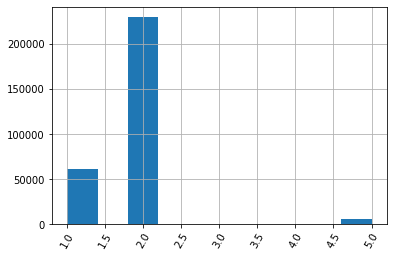

In [12]:
data[:,0]
plt.xticks(rotation = 60)
df['C42'].hist()

In [13]:
le=[None]*col_num
for i in range(col_num):
    print(i,end=' | ')
    le[i] = LabelEncoder()
    le[i].fit(data[:,i])
    data[:,i]=le[i].transform(data[:,i])
    
print(data)

0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 30 | 31 | 32 | 33 | 34 | 35 | 36 | 37 | 38 | 39 | 40 | 41 | [[0 2 45 ... 0 0 0]
 [0 2 45 ... 0 0 0]
 [0 2 45 ... 0 0 0]
 ...
 [0 2 45 ... 0 0 0]
 [0 2 45 ... 0 0 0]
 [0 2 45 ... 0 0 0]]


In [14]:
data=data.astype('int')
print(data[:,1])
print(data)

[2 2 2 ... 2 2 2]
[[ 0  2 45 ...  0  0  0]
 [ 0  2 45 ...  0  0  0]
 [ 0  2 45 ...  0  0  0]
 ...
 [ 0  2 45 ...  0  0  0]
 [ 0  2 45 ...  0  0  0]
 [ 0  2 45 ...  0  0  0]]


In [15]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
sss.get_n_splits(data[:,:(col_num - 1)], data[:,(col_num - 1)])
for train_index, test_index in sss.split(data[:,:(col_num - 1)], data[:,(col_num - 1)]):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data[:,:(col_num - 1)][train_index], data[:,:(col_num - 1)][test_index]
    y_train, y_test = data[:,(col_num - 1)][train_index], data[:,(col_num - 1)][test_index]

TRAIN: [283150 252313 291976 ... 100714 208008  41306] TEST: [282949 210148  64722 ... 282630 141504  10919]
TRAIN: [200156 245787  72685 ...  34546  23366  42520] TEST: [ 27770 288212  50269 ... 246780 206998  34948]
TRAIN: [ 52542 190373   1779 ...  38166 145899  12982] TEST: [186522 246180 236488 ... 201749 172016 185315]
TRAIN: [104323 179645  31780 ... 118249 185200   4298] TEST: [117734 284830 294568 ... 161970 169800  25461]
TRAIN: [262646  26109 161139 ... 289704 142139  26896] TEST: [277115 271825  61206 ... 128785  66574 214566]


In [16]:
X_train,X_test,y_train,y_test=train_test_split(data[:,:(col_num - 1)],data[:,(col_num - 1)],test_size=0.2, random_state=42)

In [17]:
#training and testing the data
start = time.time()
DT=tree.DecisionTreeClassifier()
DT.fit(X_train,y_train)
train_time_Dtree = time.time() - start
DT_res=DT.predict(X_test)

In [18]:
print(DT_res)

[1 1 1 ... 1 1 1]


In [19]:
print(sum(DT_res==y_test)/len(y_test)*100)

98.00991668634263


In [20]:
confusion_matrix(DT_res, y_test)

array([[11306,   556,    10],
       [  602, 45608,     0],
       [   12,     0,  1200]])

In [21]:
start = time.time()
clf = RandomForestClassifier(max_depth=100, random_state=10)
clf.fit(X_train, y_train)
train_time_RandomForest = time.time() - start

In [22]:
RF_res=clf.predict(X_test)
per_tree = [tree.predict(X_test) for tree in clf.estimators_]

In [23]:
print(sum(RF_res==y_test)/len(y_test)*100)

98.02509528788748


In [24]:
confusion_matrix(RF_res, y_test)

array([[11319,   558,    12],
       [  599, 45606,     0],
       [    2,     0,  1198]])

In [25]:
start = time.time()
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
train_time_QDA = time.time() - start

start_time = time.time()
result = permutation_importance(
    qda, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

QDA_res=qda.predict(X_test)

print(sum(QDA_res==y_test)/len(y_test)*100)

print(precision_score(QDA_res,y_test,average='micro'))

print(recall_score(QDA_res,y_test,average='micro'))

print(f1_score(QDA_res,y_test,average='micro'))

confusion_matrix(QDA_res, y_test)
print(confusion_matrix(QDA_res,y_test))

/home/crazyflie/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Elapsed time to compute the importances: 17.661 seconds
95.95911896650588
0.9595911896650589
0.9595911896650589
0.9595911896650589
[[10277    59   694]
 [ 1573 46105     0]
 [   70     0   516]]


In [26]:
start = time.time()
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
train_time_SVM = time.time() - start

In [27]:
SVM_res=clf.predict(X_test)
print(train_time_SVM)
print(sum(SVM_res==y_test)/len(y_test)*100)

297.3231258392334
97.24930009781765


In [29]:
definatelyfinal_res = []
for i in range(len(QDA_res)):
    val = QDA_res[i] + RF_res[i] + DT_res[i]
    val = round(val/3 + 0.1)
    definatelyfinal_res.append(val)
    #print(val)
print(sum(definatelyfinal_res==y_test)/len(y_test)*100)
confusion_matrix(definatelyfinal_res, y_test)

96.73154113401019


array([[11239,   557,     5],
       [  681, 45607,   695],
       [    0,     0,   510]])

In [30]:
weird_final_res = []
for i in range(len(QDA_res)):
    if QDA_res[i] == RF_res[i] == DT_res[i]:
        val = QDA_res[i]
    elif QDA_res[i] == RF_res[i]:
        val = QDA_res[i]
    elif QDA_res[i] == DT_res[i]:
        val = QDA_res[i]
    elif RF_res[i] == DT_res[i]:
        val = DT_res[i]
    
    weird_final_res.append(val)
    #print(val)
print(sum(weird_final_res==y_test)/len(y_test)*100)
confusion_matrix(weird_final_res, y_test)

98.02509528788748


array([[11317,   557,    11],
       [  600, 45607,     0],
       [    3,     0,  1199]])

In [31]:
four_final_res = []
for i in range(len(QDA_res)):
    element_list = [QDA_res[i],RF_res[i],SVM_res[i]]
    try:
        val = mode(element_list)
    except:
        val = random.choice(element_list)
    four_final_res.append(val)
    #print(val)
print(sum(four_final_res==y_test)/len(y_test)*100)
confusion_matrix(four_final_res, y_test)

97.05366478901743


array([[11172,   735,   264],
       [  721, 45429,     0],
       [   27,     0,   946]])

In [32]:
gnb = GaussianNB()

NB_pred = gnb.fit(X_train, y_train).predict(X_test)

print(sum(NB_pred==y_test)/len(y_test)*100)
confusion_matrix(NB_pred, y_test)

four_final_res = []
for i in range(len(QDA_res)):
    element_list = [QDA_res[i],RF_res[i],SVM_res[i],NB_pred[i]]
    try:
        val = mode(element_list)
    except:
        val = random.choice(element_list)
    four_final_res.append(val)
    #print(val)
print(sum(four_final_res==y_test)/len(y_test)*100)

94.74820386548386
96.46844537389954


In [34]:
three_tree_final_res = []
for i in range(len(QDA_res)):
    element_list = [QDA_res[i],SVM_res[i],NB_pred[i]]
    for element in per_tree:
        element_list.append(element[i])
    try:
        val = mode(element_list)
    except:
        val = random.choice(element_list)
    three_tree_final_res.append(val)
    #print(val)
print(sum(three_tree_final_res==y_test)/len(y_test)*100)

97.94582925759774
